In [106]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from numpy.random import multinomial, dirichlet
from math import factorial
from scipy.special import gamma

In [33]:
multinomial(100, [0.1, 0.2, 0.7])

array([ 8, 23, 69])

In [65]:
gamma(2.5)

1.329340388179137

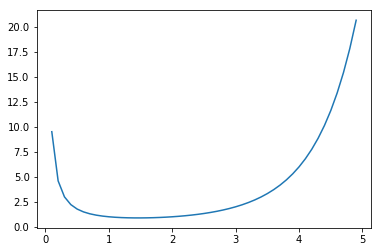

In [63]:
x =np.arange(0, 5, 0.1)
plt.plot(x, gamma(x))

In [70]:
def Beta(a):
    return np.prod(gamma(a))/gamma(np.sum(a))

The rest from: http://blog.bogatron.net/blog/2014/02/02/visualizing-dirichlet-distributions/

In [107]:
corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

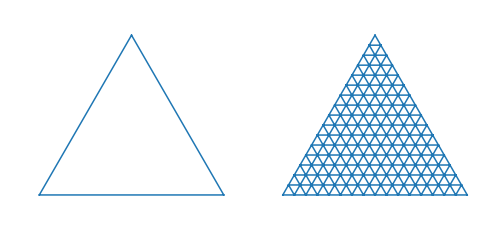

In [116]:
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

plt.figure(figsize=(8, 4))
for (i, mesh) in enumerate((triangle, trimesh)):
    plt.subplot(1, 2, i+ 1)
    plt.triplot(mesh)
    plt.axis('off')
    plt.axis('equal')

In [117]:
# Mid-points of triangle sides opposite of each corner
midpoints = [(corners[(i + 1) % 3] + corners[(i + 2) % 3]) / 2.0 \
             for i in range(3)]
def xy2bc(xy, tol=1.e-3):
    '''Converts 2D Cartesian coordinates to barycentric.'''
    s = [(corners[i] - midpoints[i]).dot(xy - midpoints[i]) / 0.75 \
         for i in range(3)]
    return np.clip(s, tol, 1.0 - tol)

In [130]:
class Dirichlet(object):
    def __init__(self, alpha):
        self._alpha = np.array(alpha)
        self._coef = 1.0 / Beta(alpha)
    def pdf(self, x):
        '''Returns pdf value for `x`.'''
        from operator import mul
        return self._coef * np.prod([xx ** (aa - 1) for (xx, aa)in zip(x, self._alpha)])

In [131]:
def draw_pdf_contours(dist, nlevels=200, subdiv=8, **kwargs):
    import math

    refiner = tri.UniformTriRefiner(triangle)
    trimesh = refiner.refine_triangulation(subdiv=subdiv)
    pvals = [dist.pdf(xy2bc(xy)) for xy in zip(trimesh.x, trimesh.y)]

    plt.tricontourf(trimesh, pvals, nlevels, **kwargs)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)
    plt.axis('off')

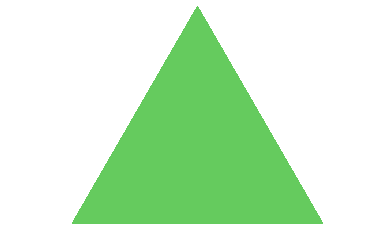

In [132]:
draw_pdf_contours(Dirichlet([1, 1, 1]))

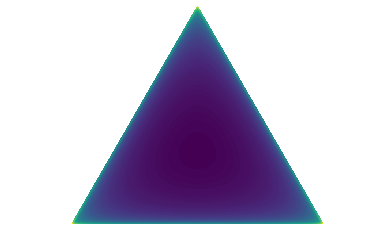

In [133]:
draw_pdf_contours(Dirichlet([0.999, 0.999, 0.999]))

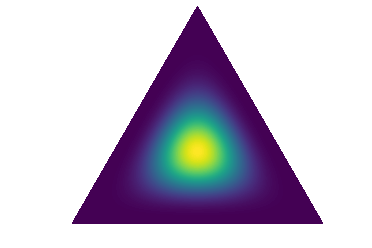

In [134]:
draw_pdf_contours(Dirichlet([5, 5, 5]))

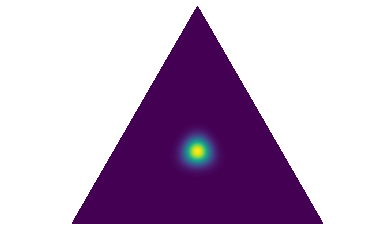

In [137]:
draw_pdf_contours(Dirichlet([50, 50, 50]))

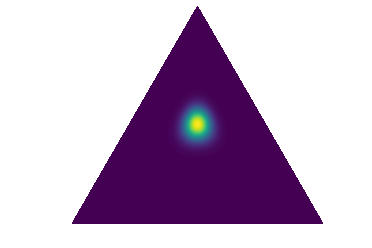

In [138]:
draw_pdf_contours(Dirichlet([30, 30, 50]))

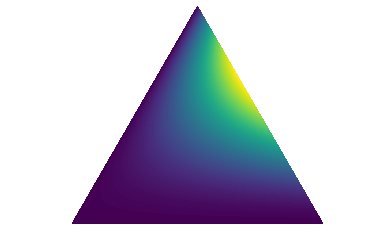

In [139]:
draw_pdf_contours(Dirichlet([1, 2, 3]))

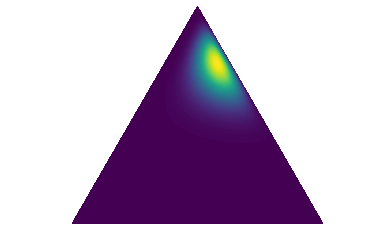

In [140]:
draw_pdf_contours(Dirichlet([2, 5, 15]))